In [1]:
import TMQGP as tm
from numpy import *
import QuarkTM
import numpy as np
from tqdm import notebook as tqdm

# Test one channel

In [2]:
erange = linspace(-5, 5, 101)
qrange = linspace(0, 5, 31)

mQ = 0.5
mG = 1.
eps = 0.15

Q = QuarkTM.Particle(mQ, qrange, erange, eps=eps, d=6.)
G = QuarkTM.Particle(mG, qrange, erange, eps=eps, stat='b', d=16.)

In [3]:
ch_qq = QuarkTM.Channel(Q, Q, 0.2, ds=4, da=1)

In [4]:
ch_qq.populate_T()

  0%|          | 0/101 [00:00<?, ?it/s]

In [5]:
ch_qg = QuarkTM.Channel(Q, G, 0.2, ds=4, da=3)

In [6]:
ch_qg.populate_T()

  0%|          | 0/101 [00:00<?, ?it/s]

In [7]:
ch_gg = QuarkTM.Channel(G, G, 0.2, ds=4, da=1)
ch_gg.populate_T()

  0%|          | 0/101 [00:00<?, ?it/s]

In [8]:
ch_gq = QuarkTM.Channel(G, Q, 0.2, ds=4, da=3)

In [9]:
ch_gq.populate_T()

  0%|          | 0/101 [00:00<?, ?it/s]

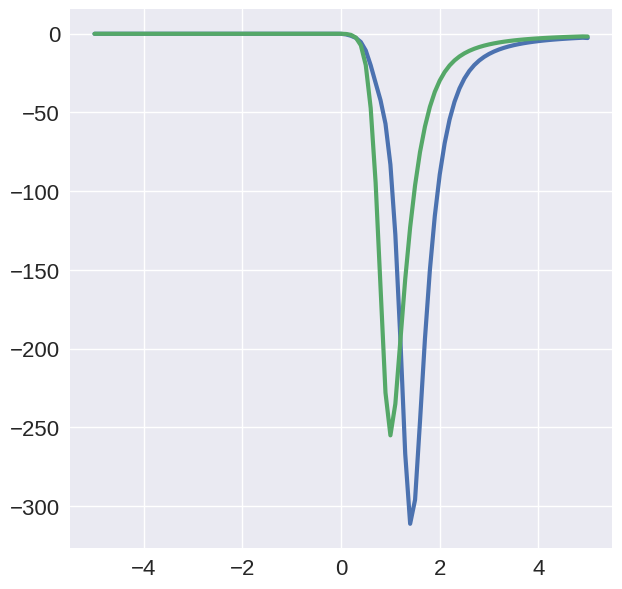

In [37]:
plt.plot(erange, imag(ch_qg.TM[:, 0]))
plt.plot(erange, imag(ch_qq.TM[:, 0]))

In [10]:
TM_ff = ch_qq.get_TMChannel()

In [11]:
TM_gg = ch_gg.get_TMChannel()

In [12]:
TM_qg = ch_qg.get_TMChannel()

In [13]:
TM_gq = ch_gq.get_TMChannel()

In [14]:
iEpsQ = tm.Interpolator(Q.qrange, Q.om0(Q.qrange), "linear")
iEpsG = tm.Interpolator(Q.qrange, G.om0(Q.qrange), "linear")

In [26]:
TMS = tm.TMArray()
# TMS.push_back(TM)
TMS.push_back(TM_ff)
TMS.push_back(TM_qg)

In [27]:
i = 0
TMS[i].eps_i(0), TMS[i].eps_j(0), TMS[i].stat_i, TMS[i].stat_j, TMS[i].Nf, TMS[i].da, TMS[i].ds, TMS[i].d


(0.5, 0.5, 'f', 'f', 3.0, 1.0, 4.0, 6.0)

In [28]:
sigma = array([tm.sigma_tot(e, 0, 0.2, TMS, Q.R, G.R) for e in erange])

In [29]:
sum(sigma)

-3.455953144114663

In [30]:
sigma_f = array([tm.sigma_ff_onshell(e, 0, 0.2, ch_qq.iImT, Q.R, iEpsQ, iEpsQ) for e in erange])

In [31]:
sigma_qg = array([tm.sigma_fb_onshell(e, 0, 0.2, ch_qg.iImT, G.R, iEpsQ, iEpsG) for e in erange])

In [20]:
sigma_gg = array([tm.sigma_bb_onshell(e, 0, 0.2, ch_gg.iImT, G.R, iEpsG, iEpsG) for e in erange])

In [53]:
TMS[i].Nf

1.0

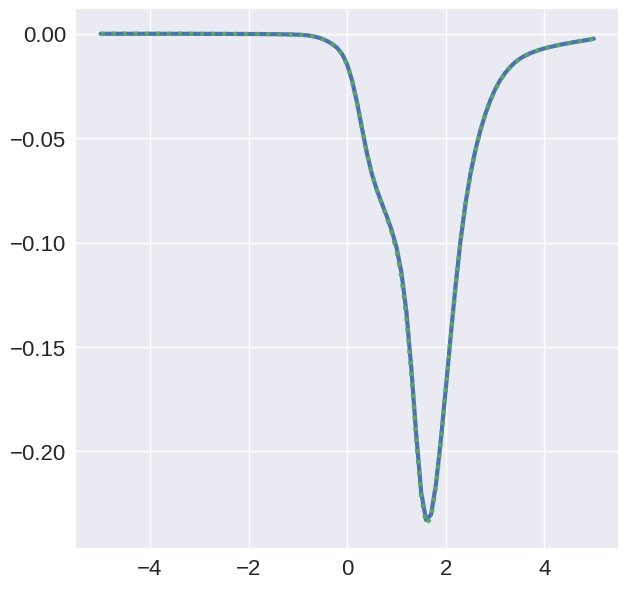

In [34]:
plt.plot(erange, sigma)
plt.plot(erange, 3*sigma_f/6*4 + 3*sigma_qg/6*4, ls=':')
# plt.plot(erange, sigma_gg/16*4, ls=':')
# plt.plot(erange, sigma_f, ls=':')

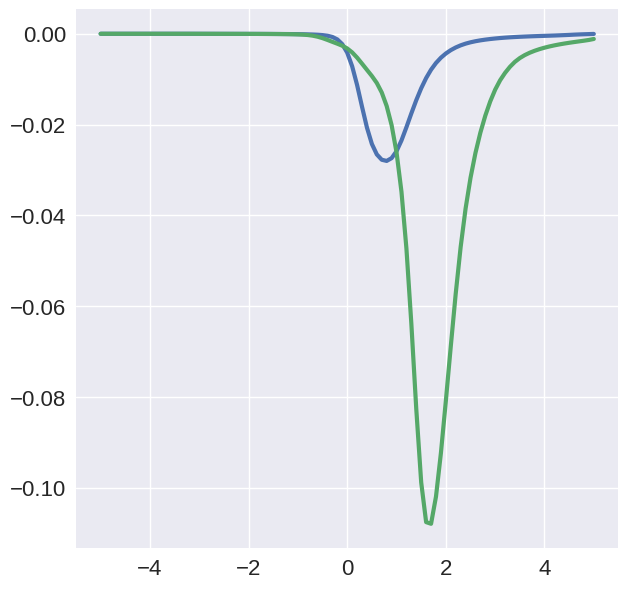

In [35]:
plt.plot(erange, sigma_f)
plt.plot(erange, sigma_qg)